In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

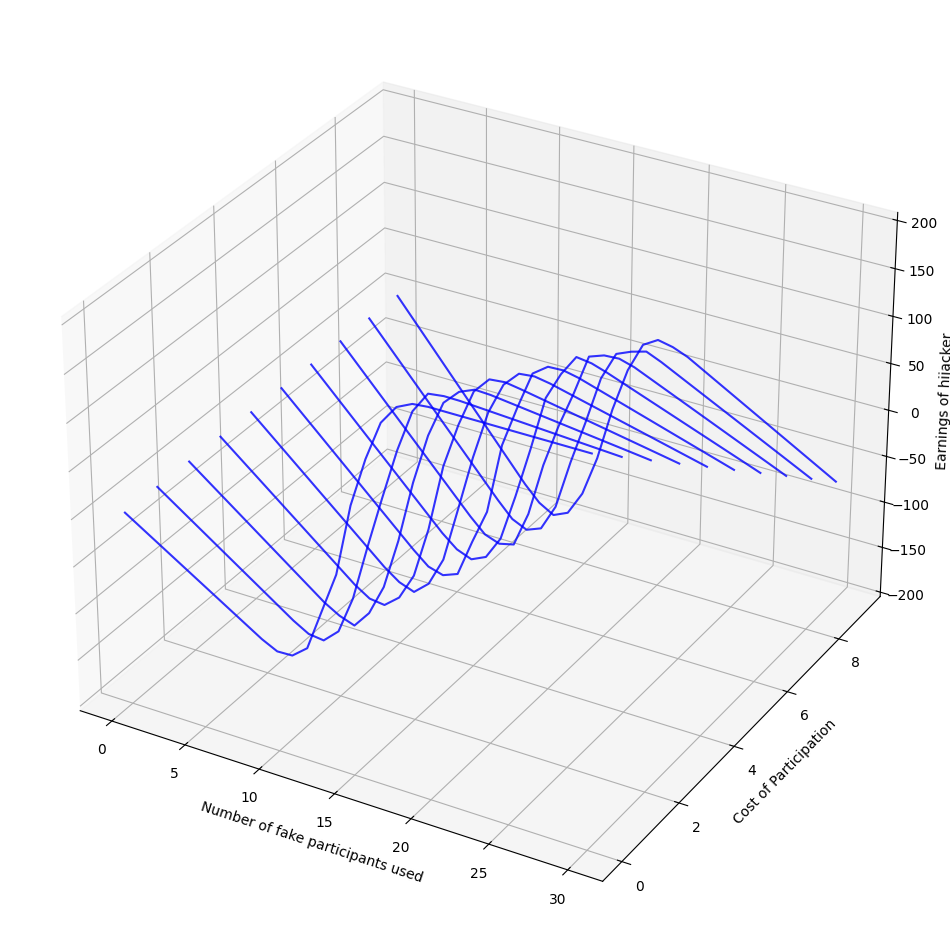

Maximum dishonest earnings: 29.64 with 18 fake participants at a cost of participation of 9


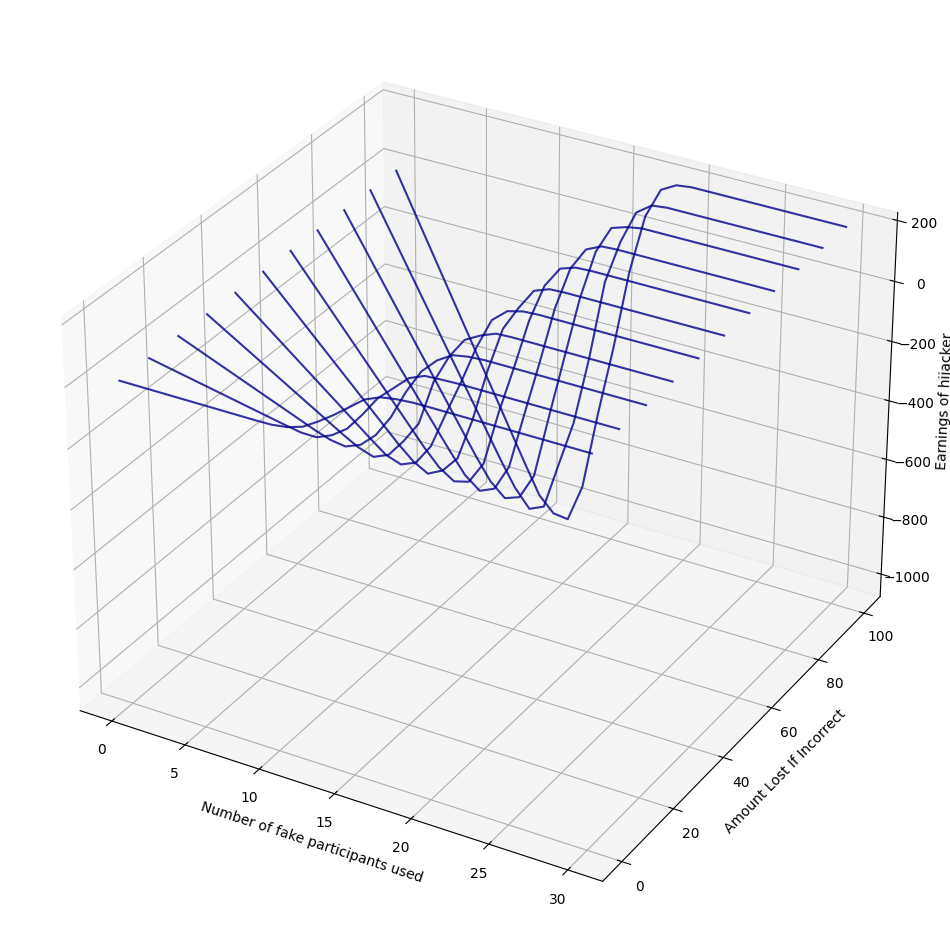

Maximum dishonest earnings: 200.0 with 20 fake participants at AmountLostIfIncorrect of 100


In [2]:
AmountPaidIfWonRound = 10
n = 30
k = 20 # number of verifiers sampled from the verifier list
amountVerified = 0 # number of verifiers that are legitimate

fig = plt.figure(figsize=(12, 13))
ax = fig.add_subplot(111, projection='3d')

repetitions = 1000
optimalAmountLostIfIncorrect = None
optimalFakeParticipants = None
minEarningsOverall = np.inf
optimalMinAmountLostIfIncorrect = None
optimalMinFakeParticipants = None

# Below graph shows 3D plot for varying Cost Of Participation and number of fake participants used by the fake entity
for costOfParticipation in range(0, AmountPaidIfWonRound):
    amountWinFakeVerifier = []
    maxEarningsOverallForCostOfParticipation = -np.inf
    for i in range(n - amountVerified + 1):
        winResults = []
        for j in range(repetitions):
            # We select the first i to be the dishonest verifiers, and the rest to be honest
            c = sum(int(b <= i) for b in random.sample(range(1, n + 1), k))  # by symmetry we assume the first i to be the dishonest verifiers all controlled by the same entity
            if c >= k / 2:
                # If we have more than k/2 fake verifiers in the system, the fake verifiers will win
                winResults.append(AmountPaidIfWonRound * k - costOfParticipation * i)
            else:
                winResults.append(-i * (costOfParticipation + AmountPaidIfWonRound))
        meanEarnings = np.mean(winResults)
        amountWinFakeVerifier.append((i, meanEarnings))
        
        # Check for maximum earning and minimize with respect to costOfParticipation
        if meanEarnings > maxEarningsOverallForCostOfParticipation:
            maxEarningsOverallForCostOfParticipation = meanEarnings
            optimalCostOfParticipation = costOfParticipation
            optimalFakeParticipants = i

    if minEarningsOverall <= maxEarningsOverallForCostOfParticipation:
        maxEarningsOverallForCostOfParticipation = meanEarnings
        optimalMinAmountLostIfIncorrect = optimalAmountLostIfIncorrect
        optimalMinFakeParticipants = optimalFakeParticipants

    amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)

    ax.plot(amountOfParticipants, amountWon, zs=costOfParticipation, zdir='y', 
        color='blue', label=f'Cost: {costOfParticipation}', alpha=0.8)


ax.set_xlabel("Number of fake participants used")
ax.set_zlabel("Earnings of hijacker")
ax.set_ylabel("Cost of Participation")
plt.show()

print(f"Maximum dishonest earnings: {maxEarningsOverallForCostOfParticipation} with {optimalFakeParticipants} fake participants at a cost of participation of {optimalCostOfParticipation}")

# 3D graph for varying Amount Lost If Incorrect
fig = plt.figure(figsize=(12, 13))
ax = fig.add_subplot(111, projection='3d')

optimalAmountLostIfIncorrect = None
optimalFakeParticipants = None
minEarningsOverall = np.inf
optimalMinAmountLostIfIncorrect = None
optimalMinFakeParticipants = None
AmountPaidIfWonRound = 10

for AmountLostIfIncorrect in range(0, 101, 10):
    amountWinFakeVerifier = []
    maxEarningsOverallForAmountLostIfIncorrect = -np.inf
    for i in range(n - amountVerified + 1):
        winResults = []
        for j in range(repetitions):
            # We select the first i to be the dishonest verifiers, and the rest to be honest
            c = sum(int(b <= i) for b in random.sample(range(1, n + 1), k))
            if c >= k / 2:
                # If we have more than k/2 fake verifiers in the system, the fake verifiers will win. The amount they win
                # is equal to the AmountPaidIfWonRound * k
                winResults.append(AmountPaidIfWonRound * k)
            else:
                # If the fake entity lost the verification round, they pay the AmountLostIfIncorrect multiplied by the number
                # of fake verifiers used in the round
                winResults.append(-i * (AmountLostIfIncorrect))
        meanEarnings = np.mean(winResults)
        amountWinFakeVerifier.append((i, meanEarnings))

        # Check for maximum earning and minimize with respect to AmountLostIfIncorrect
        if meanEarnings > maxEarningsOverallForAmountLostIfIncorrect:
            maxEarningsOverallForAmountLostIfIncorrect = meanEarnings
            optimalAmountLostIfIncorrect = AmountLostIfIncorrect
            optimalFakeParticipants = i

    if minEarningsOverall <= maxEarningsOverallForAmountLostIfIncorrect:
        maxEarningsOverallForAmountLostIfIncorrect = meanEarnings
        optimalMinAmountLostIfIncorrect = optimalAmountLostIfIncorrect
        optimalMinFakeParticipants = optimalFakeParticipants

    amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)

    #ax.plot(amountOfParticipants, amountWon, zs=AmountLostIfIncorrect, zdir='y', label=f'AmountLost: {AmountLostIfIncorrect}', alpha=0.8)
    ax.plot(amountOfParticipants, amountWon, zs=AmountLostIfIncorrect, zdir='y', 
        color='darkblue', label=f'Cost: {costOfParticipation}', alpha=0.8)


ax.set_xlabel("Number of fake participants used")
ax.set_zlabel("Earnings of hijacker")
ax.set_ylabel("Amount Lost If Incorrect")
plt.show()

print(f"Maximum dishonest earnings: {maxEarningsOverallForAmountLostIfIncorrect} with {optimalFakeParticipants} fake participants at AmountLostIfIncorrect of {optimalAmountLostIfIncorrect}")


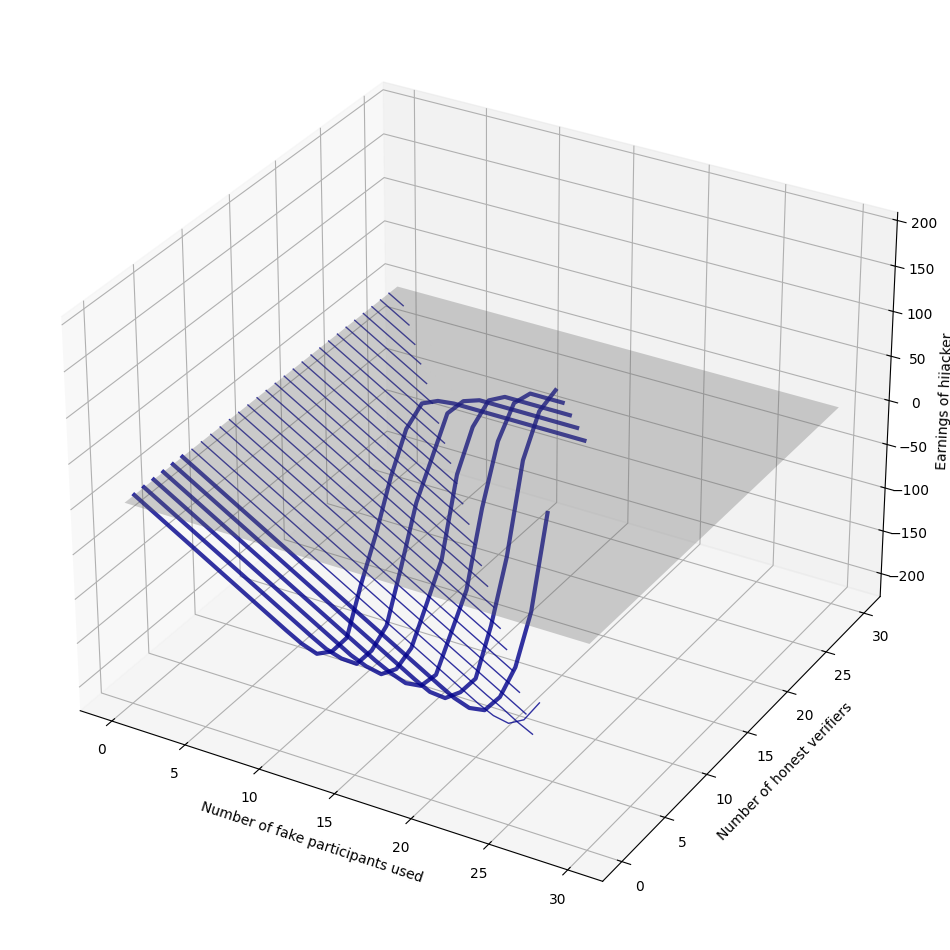

Maximum dishonest earnings: 200.0 with 21 fake participants.


In [3]:
AmountPaidIfWonRound = 10
n = 30 # number of verifiers in the initial list before sampling
k = 20  # number of verifiers sampled from the verifier list
repetitions = 1000

fig = plt.figure(figsize=(12, 13))
ax = fig.add_subplot(111, projection='3d')

optimalFakeParticipants = None
maxEarningsOverall = -np.inf
optimalMinFakeParticipants = None

# Added 2D plane for zero earnings
zero_plane = np.zeros((n + 1, n + 1))

# In this graph, we plot the 3D plane for different number of honest verifiers and fake participants used by the fake entity.
# We also plot the zero earnings plane
# The bold lines indicate where the maximum earnings by a dishonest verifier exceeded more than zero for a given number of dishonest verifiers
for honestVerifiers in range(1, n + 1):
    amountWinFakeVerifier = []
    maxEarningsForHonestVerifiers = -np.inf
    bold = False  # Flag to check if line should be bold

    for i in range(n - honestVerifiers + 1):
        winResults = []
        for j in range(repetitions):
            c = sum(int(b <= i) for b in random.sample(range(1, n + 1), k)) 
            # Since we have a fixed number of honest verifiers participating, the fake verifiers need to ensure they gain
            # more than half of the total number of votes that have been cast
            if c >= (k + honestVerifiers * 2) / 2:
                winResults.append(AmountPaidIfWonRound * k)
            else:
                winResults.append(-i * (AmountPaidIfWonRound)) # loses stake
        
        meanEarnings = np.mean(winResults)
        amountWinFakeVerifier.append((i, meanEarnings))

        # Check if any earnings are above 0, to set bold
        if meanEarnings > 0:
            bold = True

        # Check for maximum earnings and minimize with respect to costOfParticipation
        if meanEarnings > maxEarningsForHonestVerifiers:
            maxEarningsForHonestVerifiers = meanEarnings
            optimalFakeParticipants = i
    
    # Track the overall maximum earnings
    if maxEarningsOverall < maxEarningsForHonestVerifiers:
        maxEarningsOverall = maxEarningsForHonestVerifiers
        optimalMinFakeParticipants = optimalFakeParticipants

    amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)

    # Plot the 3D line with bold if the earnings went above 0
    line_width = 3 if bold else 1
    ax.plot(amountOfParticipants, amountWon, zs=honestVerifiers, zdir='y', 
            color='darkblue', lw=line_width, label=f'Honest Verifiers: {honestVerifiers}', alpha=0.8)

# Plot the zero earnings plane
x = np.arange(n + 1)
y = np.arange(n + 1)
X, Y = np.meshgrid(x, y)
Z = zero_plane
ax.plot_surface(X, Y, Z, alpha=0.3, color='gray', rstride=100, cstride=100)

ax.set_xlabel("Number of fake participants used")
ax.set_zlabel("Earnings of hijacker")
ax.set_ylabel("Number of honest verifiers")

plt.show()

print(f"Maximum dishonest earnings: {maxEarningsOverall} with {optimalMinFakeParticipants} fake participants.")

Skipping n=20, k=25 because k cannot be larger than n.


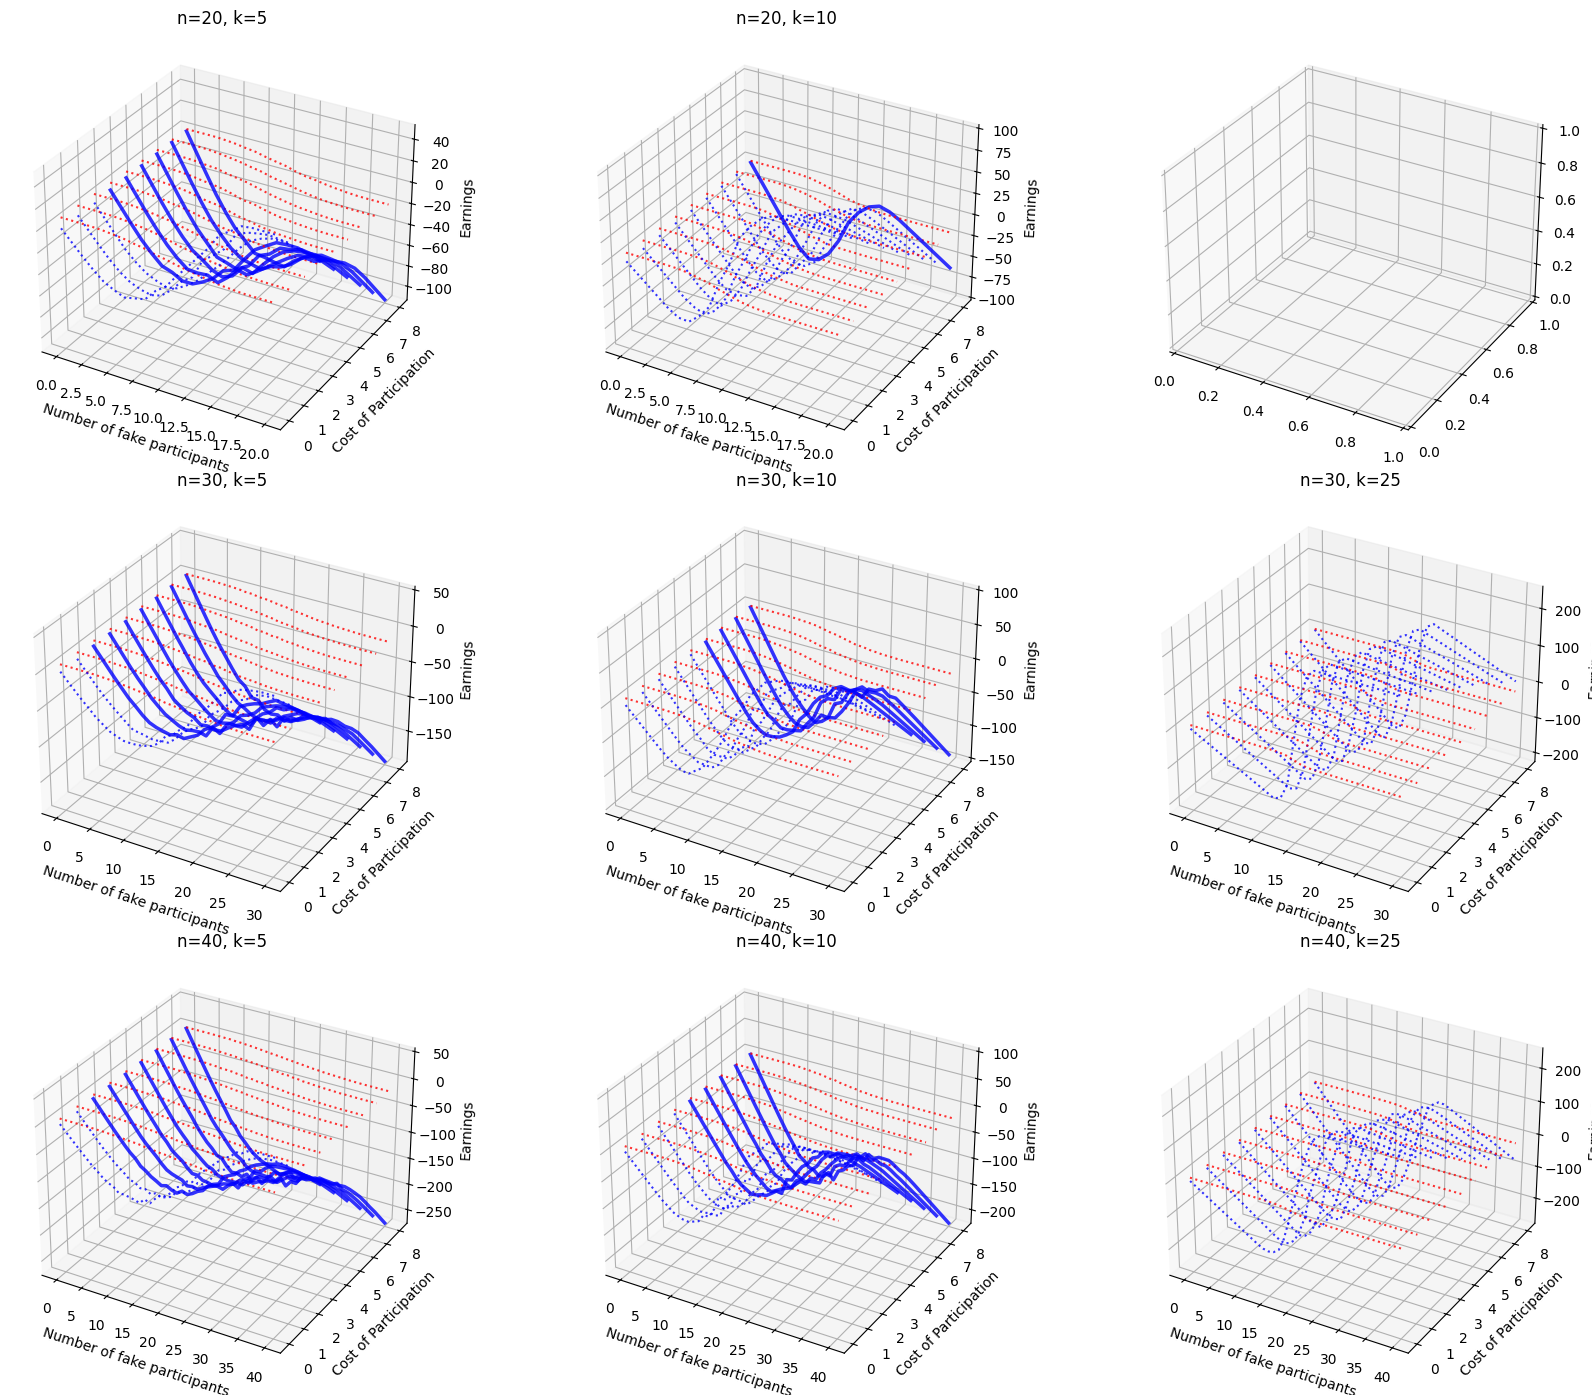

3x3 grid of 3D plots generated for different n and k values, including earnings for honest verifiers.


In [11]:
# Constants
AmountPaidIfWonRound = 10
repetitions = 1000

# Values for n and k (reduced to 3x3 grid)
n_values = [20, 30, 40]
k_values = [5, 10, 15, 25]

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(len(n_values), len(k_values), figsize=(20, 15), subplot_kw={'projection': '3d'})

# In this graph, we plot the 3D plane for different number of costs of participation and fake participants used by the fake entity.
for i, n in enumerate(n_values):
    for j, k in enumerate(k_values):
        if k > n:
            print(f"Skipping n={n}, k={k} because k cannot be larger than n.")
            continue
        
        ax = axs[i, j]
        maxEarningsOverallForCostOfParticipation = -np.inf

        for costOfParticipation in range(0, AmountPaidIfWonRound-1):
            amountWinFakeVerifier = []
            amountWinHonestVerifier = []
            for num_fake_participants in range(n + 1):
                num_fake_participants = int(num_fake_participants)  # Ensure it is an integer
                winResults = [] # the earnings that will be made to the fake participant
                honestVerifiersPayment = [] # the payments that will be made to the honest participant
                for _ in range(repetitions):
                    # Randomly select k participants
                    c = sum(int(b <= num_fake_participants) for b in random.sample(range(1, n + 1), k))
                    # If we have more than k/2 fake verifiers in the system, the fake verifiers will win.
                    # We assume that the first num_fake_participants to be the fake verifiers all controlled by the same entity
                    if c >= k / 2:
                        winResults.append(AmountPaidIfWonRound * k - costOfParticipation * num_fake_participants)
                        honestVerifiersPayment.append(-costOfParticipation - AmountPaidIfWonRound)
                    else:
                        winResults.append(-num_fake_participants * (costOfParticipation + AmountPaidIfWonRound))
                        honestVerifiersPayment.append(AmountPaidIfWonRound - costOfParticipation)
                meanEarnings = np.mean(winResults)
                meanHonestVerifierPayment = np.mean(honestVerifiersPayment)
                amountWinFakeVerifier.append((num_fake_participants, meanEarnings))
                amountWinHonestVerifier.append((num_fake_participants, meanHonestVerifierPayment))
            
            # Plot for fake verifier earnings
            amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)
            if any(earnings > 0 for earnings in amountWon):
                linestyle = 'dotted'
                linewidth = 1.5  # Bold line
            else:
                linestyle = 'solid'
                linewidth = 2.5  # Dotted line

            ax.plot(amountOfParticipants, amountWon, zs=costOfParticipation, zdir='y', color='blue', 
                    linestyle=linestyle, linewidth=linewidth, alpha=0.8)

            # Plot for honest verifier earnings
            amountOfParticipants, honestEarnings = zip(*amountWinHonestVerifier)
            if any(earnings > 0 for earnings in honestEarnings):
                honest_linestyle = 'dotted'
                honest_linewidth = 1.5  # Dotted line
            else:
                honest_linestyle = 'solid'
                honest_linewidth = 2.5  # Bold line

            ax.plot(amountOfParticipants, honestEarnings, zs=costOfParticipation, zdir='y', color='red', 
                    linestyle=honest_linestyle, linewidth=honest_linewidth, alpha=0.8)

            # Find maximum earnings
            if meanEarnings > maxEarningsOverallForCostOfParticipation:
                maxEarningsOverallForCostOfParticipation = meanEarnings

        ax.set_title(f'n={n}, k={k}')
        ax.set_xlabel("Number of fake participants")
        ax.set_zlabel("Earnings")
        ax.set_ylabel("Cost of Participation")

plt.tight_layout()
plt.show()

print("3x3 grid of 3D plots generated for different n and k values, including earnings for honest verifiers.")

Skipping n=20, k=25 because k cannot be larger than n.


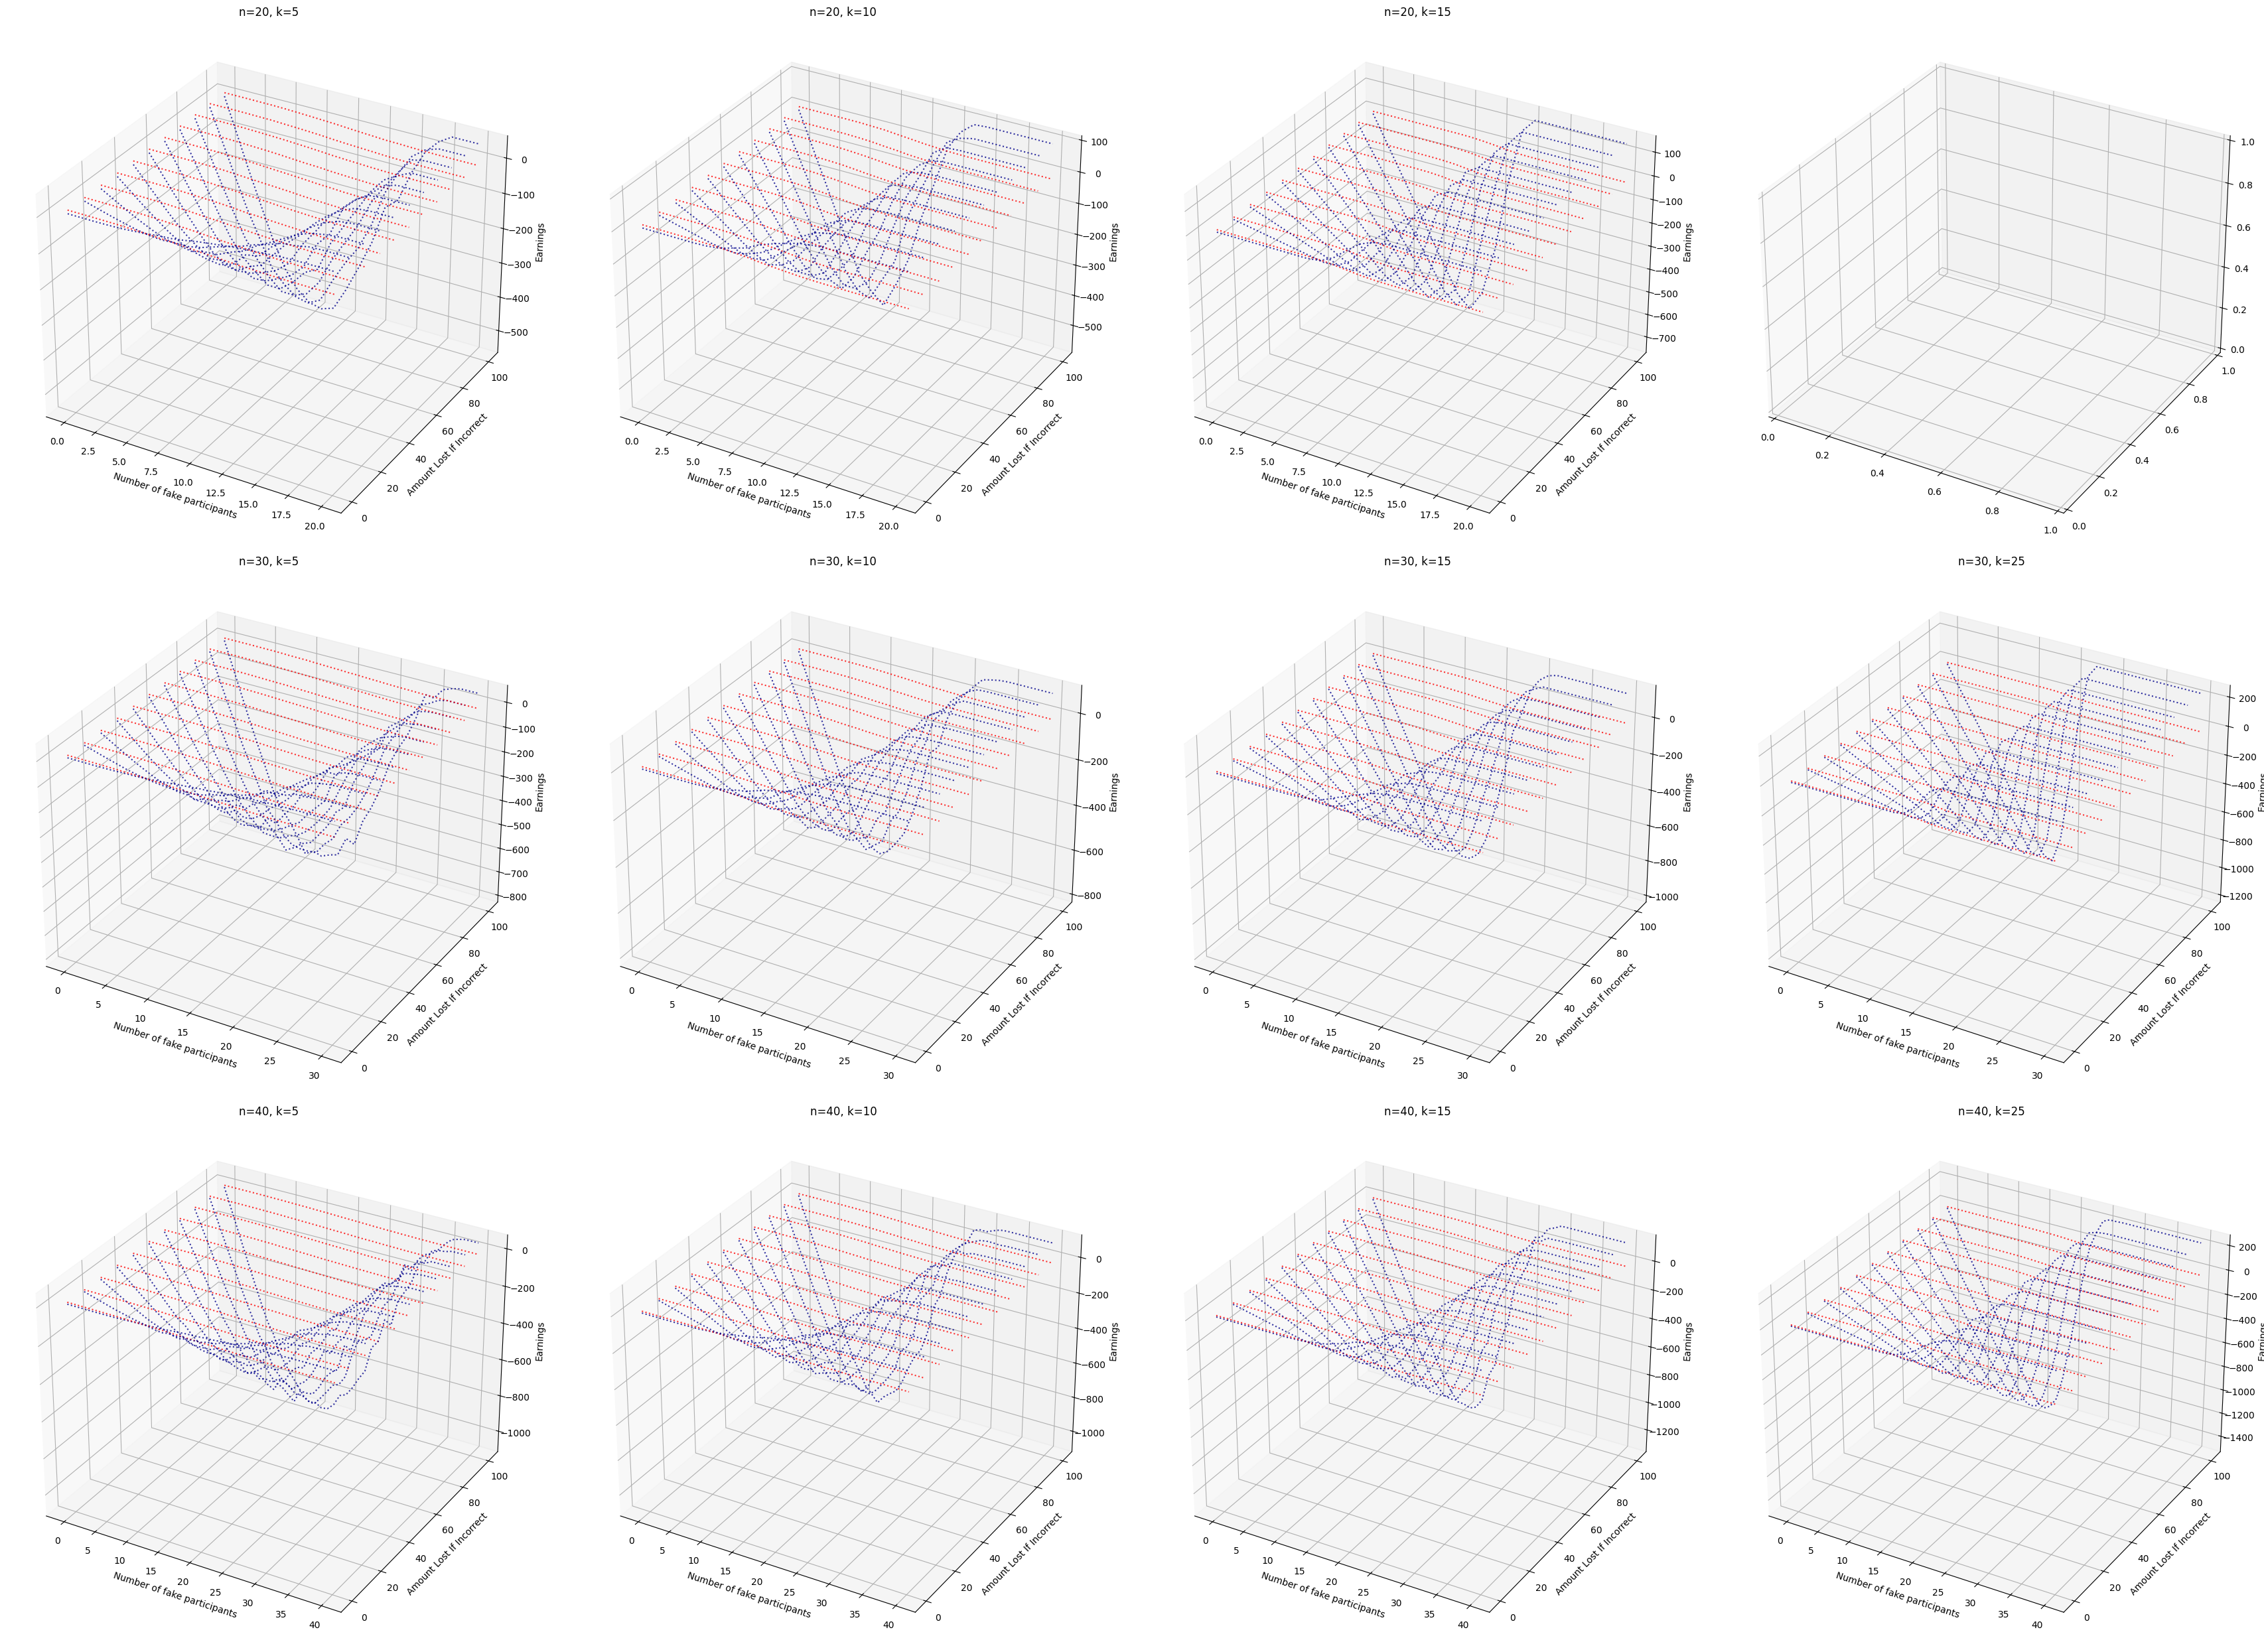

In [19]:
# Constants
AmountPaidIfWonRound = 10
repetitions = 1000

n_values = [20, 30, 40]
k_values = [5, 10, 15, 25]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(len(n_values), len(k_values), figsize=(35, 25), subplot_kw={'projection': '3d'})

# In this graph, we plot the 3D plane for different amounts of penalties for incorrect answer (an answer that devaited from majority) and fake participants used by the fake entity.
for i, n in enumerate(n_values):
    for j, k in enumerate(k_values):
        if k > n:
            print(f"Skipping n={n}, k={k} because k cannot be larger than n.")
            continue
        
        ax = axs[i, j]
        maxEarningsOverallForAmountLostIfIncorrect = -np.inf

        # We vary the penalty from 0 to 101
        for AmountLostIfIncorrect in range(0, 101, 10):
            amountWinFakeVerifier = []
            amountWinHonestVerifier = []
            for num_fake_participants in range(n + 1):
                winResults = []
                winResultsHonestVerifier = []
                for _ in range(repetitions):
                    c = sum(int(b <= num_fake_participants) for b in random.sample(range(1, n + 1), k))
                    if c >= k / 2:
                        winResults.append(AmountPaidIfWonRound * k)
                        winResultsHonestVerifier.append(-AmountPaidIfWonRound)
                    else:
                        winResults.append(-num_fake_participants * AmountLostIfIncorrect)
                        winResultsHonestVerifier.append(AmountPaidIfWonRound)
                meanEarnings = np.mean(winResults)
                meanEarningsHonestVerifier = np.mean(winResultsHonestVerifier)

                amountWinFakeVerifier.append((num_fake_participants, meanEarnings))
                amountWinHonestVerifier.append((num_fake_participants, meanEarningsHonestVerifier))

            # Plot for fake verifier earnings
            amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)
            if any(earnings > 0 for earnings in amountWon):
                linestyle = 'dotted'
                linewidth = 1.5  # Dotted line
            else:
                linestyle = 'solid'
                linewidth = 2.5  # Solid line

            ax.plot(amountOfParticipants, amountWon, zs=AmountLostIfIncorrect, zdir='y', 
                    color='darkblue', linestyle=linestyle, linewidth=linewidth, alpha=0.8)

            # Plot for honest verifier earnings
            amountOfParticipants, honestEarnings = zip(*amountWinHonestVerifier)
            if any(earnings > 0 for earnings in honestEarnings):
                honest_linestyle = 'dotted'
                honest_linewidth = 1.5  # Dotted line
            else:
                honest_linestyle = 'solid'
                honest_linewidth = 2.5  # Solid line

            ax.plot(amountOfParticipants, honestEarnings, zs=AmountLostIfIncorrect, zdir='y', 
                    color='red', linestyle=honest_linestyle, linewidth=honest_linewidth, alpha=0.8)

            # Find maximum earnings
            if meanEarnings > maxEarningsOverallForAmountLostIfIncorrect:
                maxEarningsOverallForAmountLostIfIncorrect = meanEarnings

        ax.set_title(f'n={n}, k={k}')
        ax.set_xlabel("Number of fake participants")
        ax.set_zlabel("Earnings")
        ax.set_ylabel("Amount Lost If Incorrect")

plt.tight_layout()
plt.show()

Skipping n=20, k=25 because k cannot be larger than n.


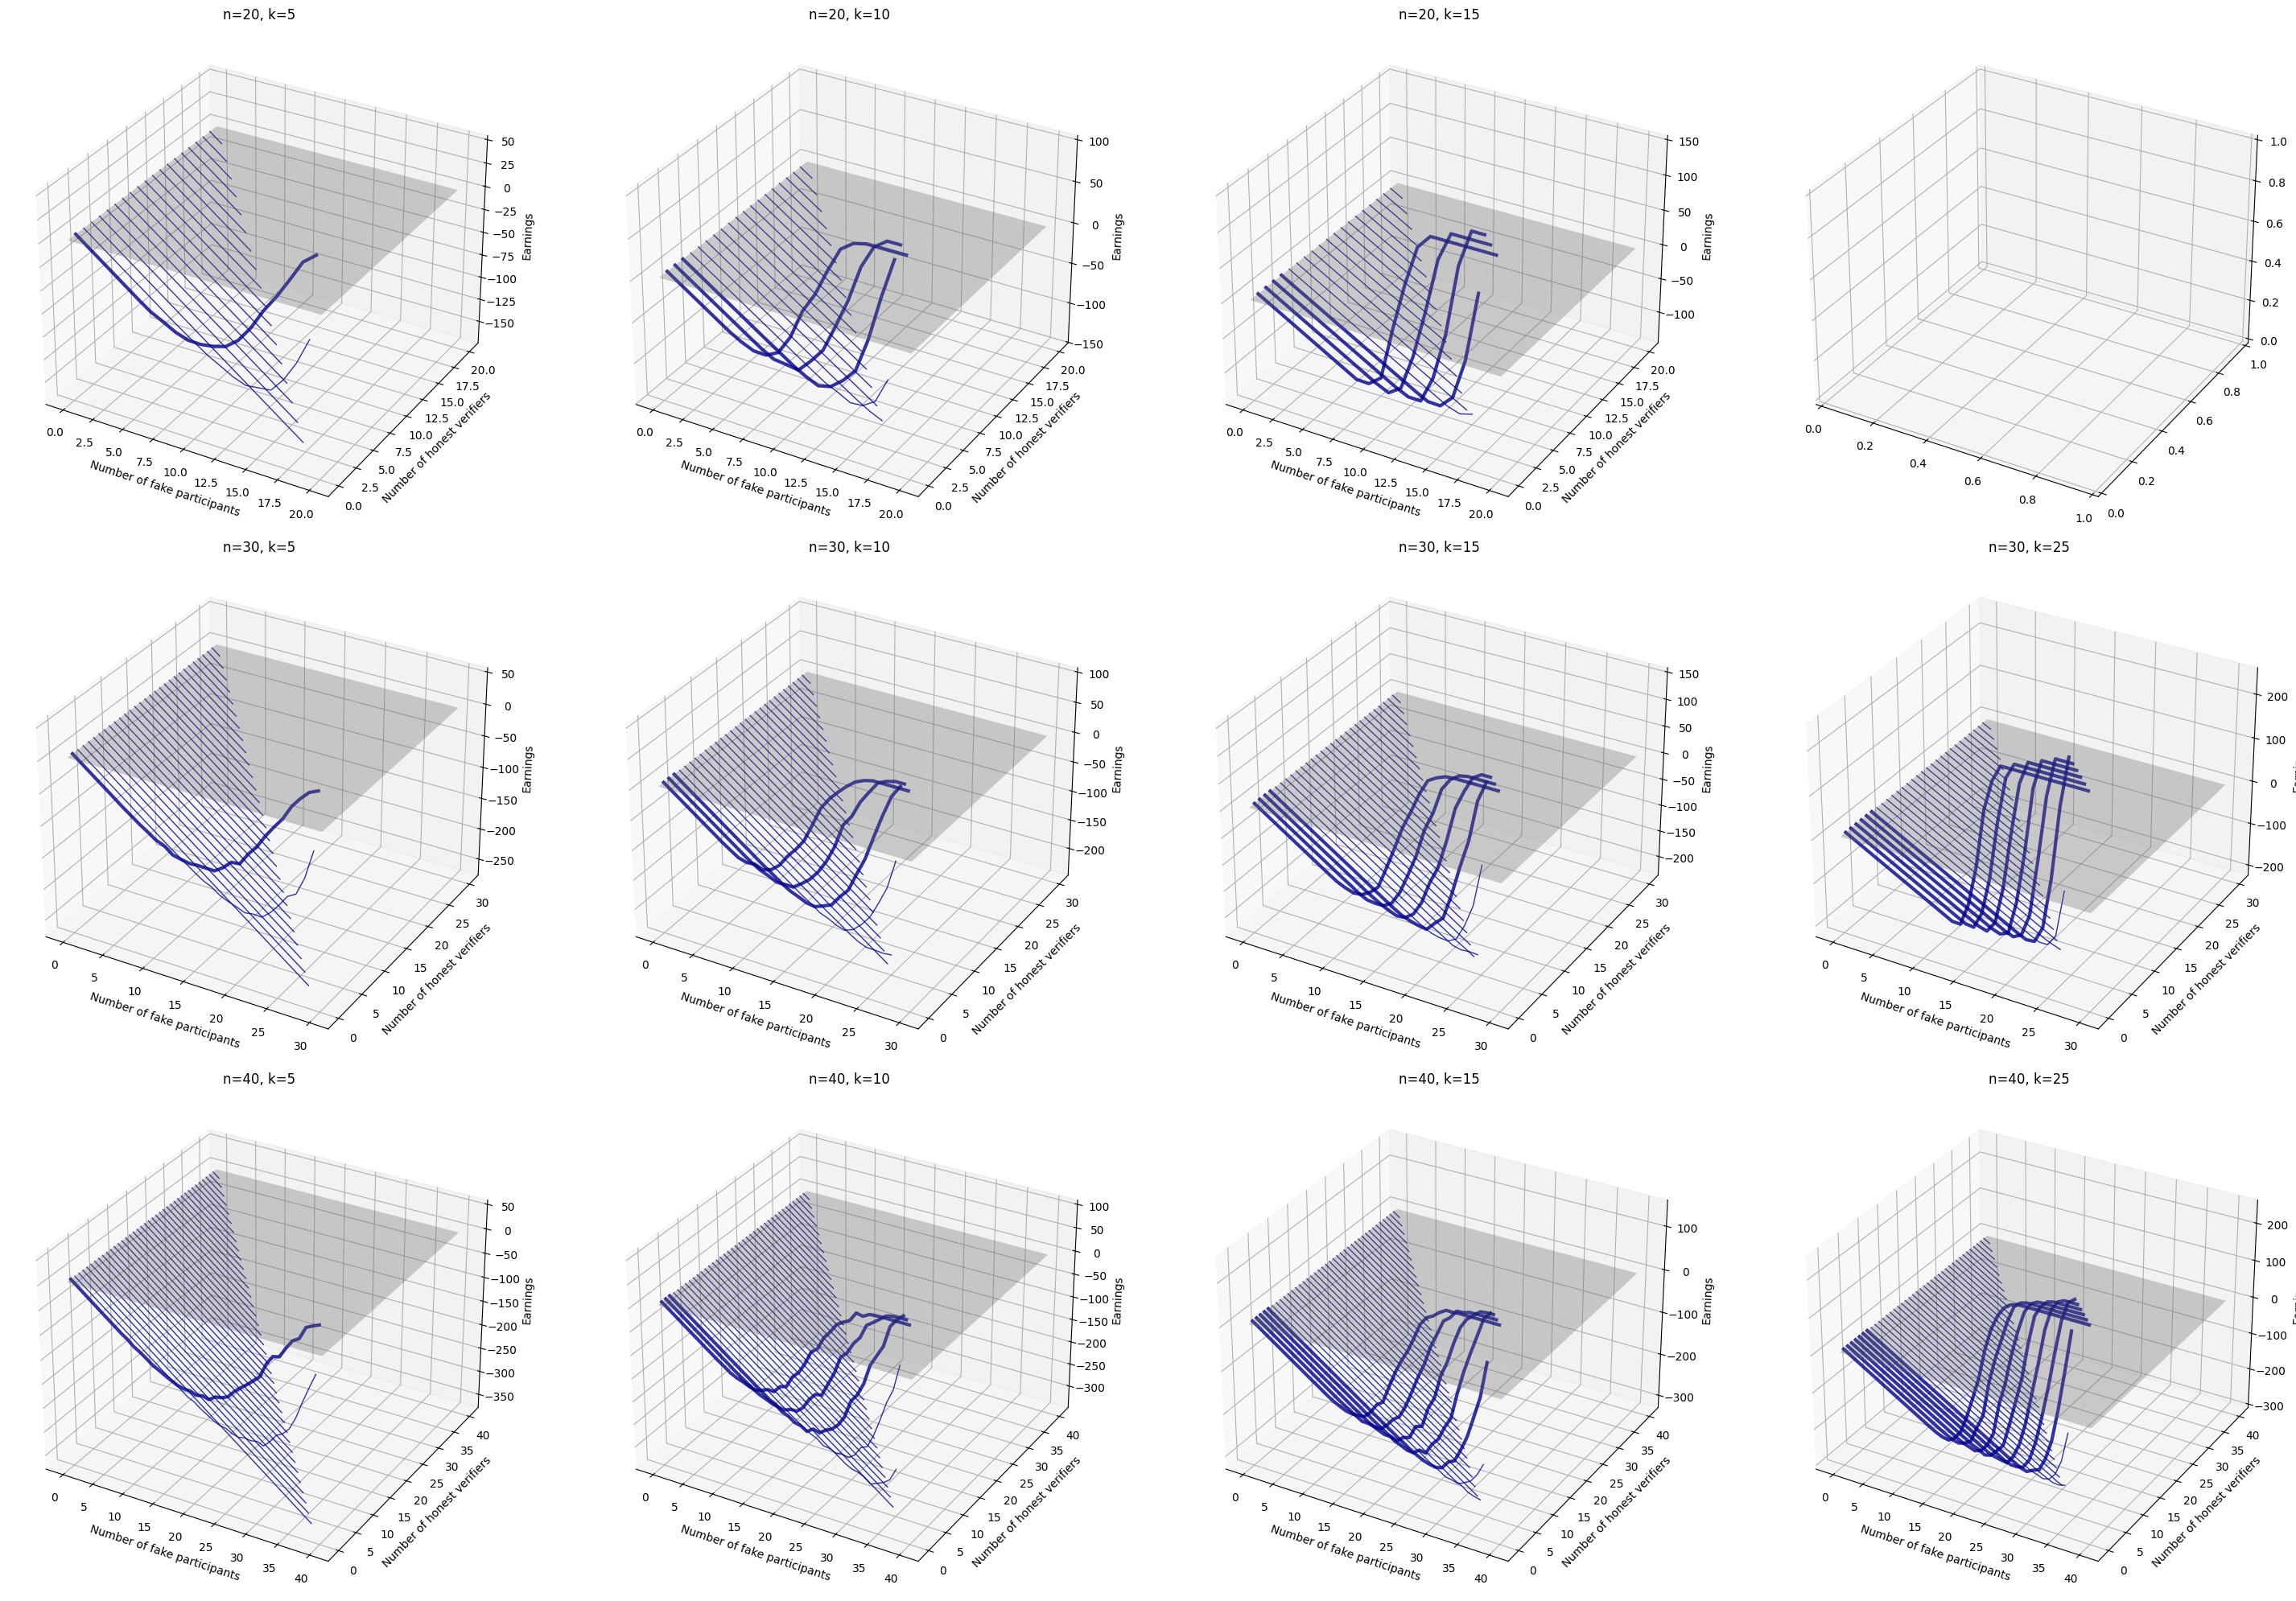

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Constants
AmountPaidIfWonRound = 10
repetitions = 1000

n_values = [20, 30, 40]
k_values = [5, 10, 15, 25]

# Create a 4x4 grid of subplots
fig, axs = plt.subplots(len(n_values), len(k_values), figsize=(30, 20), subplot_kw={'projection': '3d'})

for i, n in enumerate(n_values):
    for j, k in enumerate(k_values):
        if k > n:
            print(f"Skipping n={n}, k={k} because k cannot be larger than n.")
            continue
        
        ax = axs[i, j]
        maxEarningsOverall = -np.inf
        optimalMinFakeParticipants = None

        # Added 2D plane for zero earnings
        zero_plane = np.zeros((n + 1, n + 1))

        # In this graph, we plot the 3D plane for different number of honest verifiers and fake participants used by the fake entity.
        for honestVerifiers in range(1, n + 1):
            amountWinFakeVerifier = []
            maxEarningsForHonestVerifiers = -np.inf
            bold = False  # Flag to check if line should be bold

            for num_fake_participants in range(n - honestVerifiers + 1):
                winResults = []
                for _ in range(repetitions):
                    c = sum(int(b <= num_fake_participants) for b in random.sample(range(1, n + 1), k))
                    # Since we have a fixed number of honest verifiers participating, the fake verifiers need to ensure they gain
                    # more than half of the total number of votes that have been cast
                    if c >= (k + honestVerifiers * 2) / 2:
                        winResults.append(AmountPaidIfWonRound * k)
                    else:
                        winResults.append(-num_fake_participants * (AmountPaidIfWonRound))  # loses stake
                
                meanEarnings = np.mean(winResults)
                amountWinFakeVerifier.append((num_fake_participants, meanEarnings))

                # Check if any earnings are above 0, to set bold
                if meanEarnings > 0:
                    bold = True

                # Check for maximum earnings and minimize with respect to costOfParticipation
                if meanEarnings > maxEarningsForHonestVerifiers:
                    maxEarningsForHonestVerifiers = meanEarnings
                    optimalFakeParticipants = num_fake_participants

            # Track the overall maximum earnings
            if maxEarningsOverall < maxEarningsForHonestVerifiers:
                maxEarningsOverall = maxEarningsForHonestVerifiers
                optimalMinFakeParticipants = optimalFakeParticipants

            amountOfParticipants, amountWon = zip(*amountWinFakeVerifier)

            # Plot the 3D line with bold if the earnings went above 0
            line_width = 3 if bold else 1
            ax.plot(amountOfParticipants, amountWon, zs=honestVerifiers, zdir='y', 
                    color='darkblue', lw=line_width, label=f'Honest Verifiers: {honestVerifiers}', alpha=0.8)

        # Plot the zero earnings plane
        x = np.arange(n + 1)
        y = np.arange(n + 1)
        X, Y = np.meshgrid(x, y)
        Z = zero_plane
        ax.plot_surface(X, Y, Z, alpha=0.3, color='gray', rstride=100, cstride=100)

        ax.set_title(f'n={n}, k={k}')
        ax.set_xlabel("Number of fake participants")
        ax.set_zlabel("Earnings")
        ax.set_ylabel("Number of honest verifiers")

plt.tight_layout()
plt.show()